In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_colwidth', None)

In [2]:
data = pd.read_csv('Dataset - NLP Assignment.csv')


In [3]:
data.head()

,ID,MEMBER_ID,REASONNPSSCORE__C
0,a2p1U000000RowfQAC,0011U00000rjFKdQAM,"I showed up for my appointment, but they had me double booked, so we didn't get to meet with the doctor for very long, and had an expedited visit. The doctor and staff were extremely friendly and apologized, and the office environment was very nice!"
1,a2p1U000000RqQqQAK,0011U00000riCSHQA2,"Staff was polite, courteous, and on time"
2,a2p1U000000RqXyQAK,0011U00000riTw7QAE,Overall care is great! It's wonderful to be able to spend 45-60 minutes with the actual Dr.
3,a2p1U000000Rq1LQAS,0011U00000rhu8eQAA,Like the doctor and staff at this location. Easy to get any appointment.
4,a2p1U000000RpiuQAC,0011U00000rk4SHQAY,The convenience and the doctors


In [4]:
# checking null values
data.isnull().sum()

ID                   0
MEMBER_ID            0
REASONNPSSCORE__C    0
dtype: int64

In [5]:
# information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3812 entries, 0 to 3811
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 3812 non-null   object
 1   MEMBER_ID          3812 non-null   object
 2   REASONNPSSCORE__C  3812 non-null   object
dtypes: object(3)
memory usage: 89.5+ KB


In [6]:
data.drop(columns=['ID','MEMBER_ID'],inplace=True)

In [7]:
data

,REASONNPSSCORE__C
0,"I showed up for my appointment, but they had me double booked, so we didn't get to meet with the doctor for very long, and had an expedited visit. The doctor and staff were extremely friendly and apologized, and the office environment was very nice!"
1,"Staff was polite, courteous, and on time"
2,Overall care is great! It's wonderful to be able to spend 45-60 minutes with the actual Dr.
3,Like the doctor and staff at this location. Easy to get any appointment.
4,The convenience and the doctors
...,...
3807,yes
3808,"Very skeptical that you will soon be without a Dr. and possibly for how long? When I call, nobody ever answers the phone!"
3809,"Doctor Malfese is easily accessible, staff is friendly and helpful. There are two locations nearby."
3810,Friendly Staff that can be reached at any time


In [8]:
data['REASONNPSSCORE__C'] = data['REASONNPSSCORE__C'].astype(str)

In [9]:
data

,REASONNPSSCORE__C
0,"I showed up for my appointment, but they had me double booked, so we didn't get to meet with the doctor for very long, and had an expedited visit. The doctor and staff were extremely friendly and apologized, and the office environment was very nice!"
1,"Staff was polite, courteous, and on time"
2,Overall care is great! It's wonderful to be able to spend 45-60 minutes with the actual Dr.
3,Like the doctor and staff at this location. Easy to get any appointment.
4,The convenience and the doctors
...,...
3807,yes
3808,"Very skeptical that you will soon be without a Dr. and possibly for how long? When I call, nobody ever answers the phone!"
3809,"Doctor Malfese is easily accessible, staff is friendly and helpful. There are two locations nearby."
3810,Friendly Staff that can be reached at any time


<AxesSubplot:>

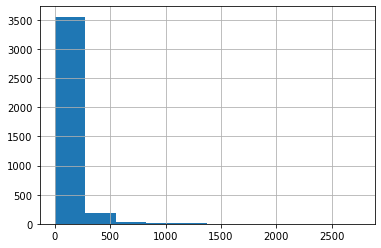

In [10]:
data.REASONNPSSCORE__C.str.len().hist()

- ##  Most feedback character of text is in range between 0 to 300 

In [12]:
# Word Length Histogram

import numpy as np

def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()


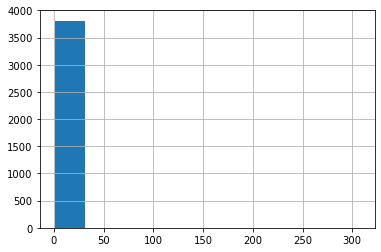

In [13]:
plot_word_length_histogram(data['REASONNPSSCORE__C'])

* ### Most word length is in between 1 to 25

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<BarContainer object of 10 artists>

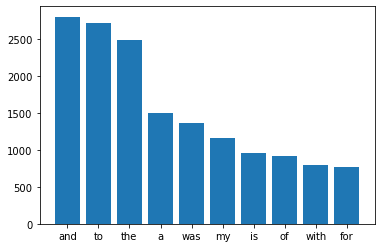

In [17]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))

corpus=[]
new= data['REASONNPSSCORE__C'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)


In [19]:
# Code Snippet for Top Non-Stopwords Barchart

import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

##### doctor word is occuring most of the time as we can in this 

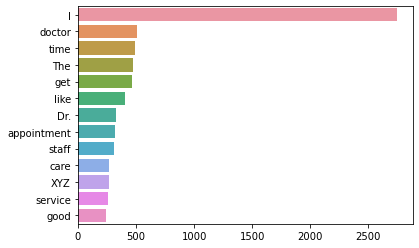

In [20]:
plot_top_non_stopwords_barchart(data['REASONNPSSCORE__C'])

In [21]:
from nltk.util import ngrams

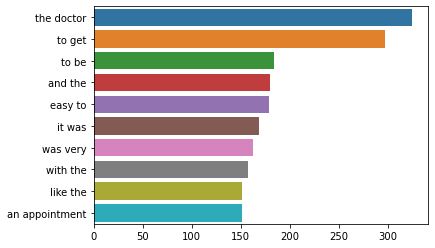

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

plot_top_ngrams_barchart(data['REASONNPSSCORE__C'],2)
